<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/indicator/VIX_with_Boll_band.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
vix_data=pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/.github.io/refs/heads/master/work/ml/indiavi.csv')

In [7]:
vix_data.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Prev. Close ', 'Change ',
       '% Change ', 'Open_Nify', 'High_Nifty', 'Low_Nifty', 'Close_nifty'],
      dtype='object')

In [8]:
# Calculate the percentile scores
vix_data['Percentile'] = vix_data['Close '].rank(pct=True) * 100

# Calculate Bollinger Bands
rolling_window = 20
vix_data['Rolling Mean'] = vix_data['Close '].rolling(window=rolling_window).mean()
vix_data['Rolling Std'] = vix_data['Close '].rolling(window=rolling_window).std()
vix_data['Upper Band'] = vix_data['Rolling Mean'] + (2 * vix_data['Rolling Std'])
vix_data['Lower Band'] = vix_data['Rolling Mean'] - (2 * vix_data['Rolling Std'])

# 2) Compute daily log‑returns
vix_data['log_ret'] = np.log(vix_data['Close_nifty'] / vix_data['Close_nifty'].shift(1))

# 3) Realised volatility (rolling 21‑day window, annualised)
window = 21                                    # ≈1 trading month
vix_data['rv'] = vix_data['log_ret'].rolling(window).std(ddof=0) * np.sqrt(252)  # 252 ≈ trading days/yr
# Calculate the percentile scores
vix_data['RV_Percentile'] = vix_data['rv'].rank(pct=True) * 100


In [9]:
vix_data.set_index('Date ',inplace=True)

/tmp/ipython-input-10-2871015713.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vix_data.index = pd.to_datetime(vix_data.index)


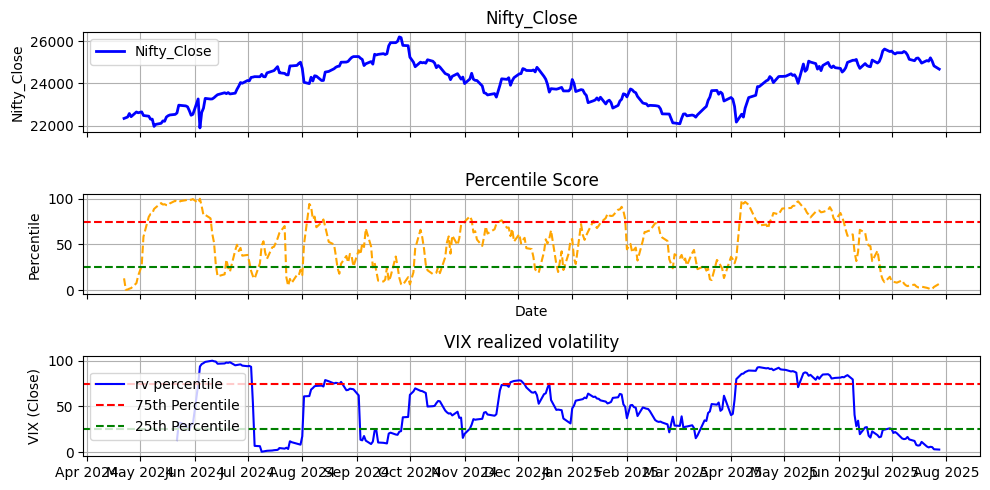

In [10]:
import matplotlib.dates as mdates

# Convert the index to datetime if not already
vix_data.index = pd.to_datetime(vix_data.index)

import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10,5), sharex=True)

# Plot VIX in the first subplot
axes[0].plot(vix_data.index, vix_data['Close_nifty'], label='Nifty_Close', linewidth=2, color='blue')
axes[0].set_title('Nifty_Close')
axes[0].set_ylabel('Nifty_Close')
axes[0].grid(True)
axes[0].legend()

# Plot Percentile Score in the second subplot
axes[1].plot(vix_data.index, vix_data['Percentile'], label='Percentile Score', linestyle='--', color='orange')
axes[1].set_title('Percentile Score')
axes[1].set_ylabel('Percentile')
axes[1].set_xlabel('Date')
axes[1].grid(True)

axes[1].axhline(y=75, color='red', linestyle='--', label='75th Percentile')
axes[1].axhline(y=25, color='green', linestyle='--', label='25th Percentile')

axes[2].plot(vix_data.index, vix_data['RV_Percentile'], label='rv percentile', color='blue')
axes[2].axhline(y=75, color='red', linestyle='--', label='75th Percentile')
axes[2].axhline(y=25, color='green', linestyle='--', label='25th Percentile')

axes[2].set_title("VIX realized volatility")
axes[2].set_ylabel("VIX (Close)")
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()



# Format the x-axis to show months and years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Show the plot
plt.show()


Strategy Rules:
High Volatility Trade Setup:

Condition 1: VIX breaches upper Bollinger Band.
Condition 2: Percentile Rank >90%.
Action:
Sell volatility options or short volatility instruments.
Low Volatility Trade Setup:

Condition 1: VIX breaches lower Bollinger Band.
Condition 2: Percentile Rank <10%.
Action:
Buy volatility options or hedge against market shocks.

In [30]:
vix_data['vrp']=(vix_data['Close ']-vix_data['rv'])

In [31]:
vix_data['vrp'].tail(1)

,vrp
Date,
2025-07-28,11.992913


In [24]:
median_126 = vix_data['rv'].tail(126).median()*100

In [33]:
vix_data['vrp'].iloc[-1]>median_126

np.False_

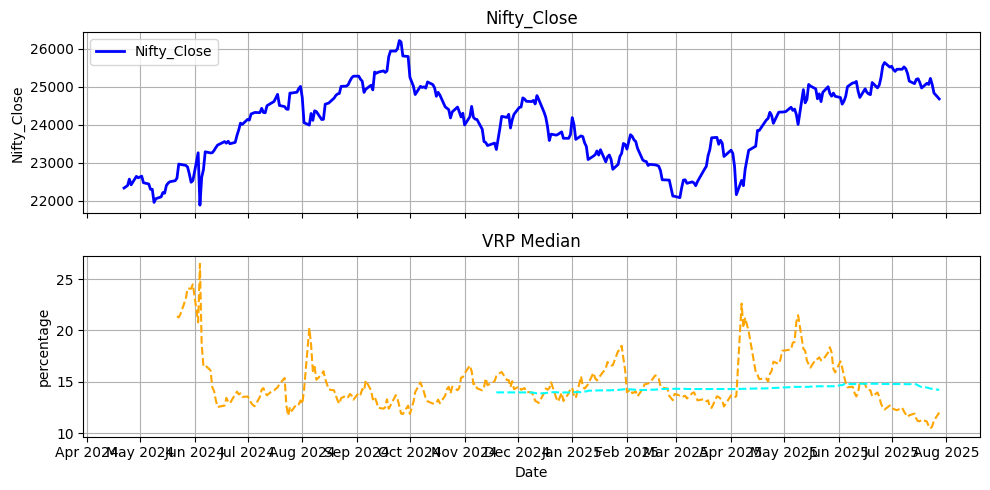

In [37]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10,5), sharex=True)

# Plot VIX in the first subplot
axes[0].plot(vix_data.index, vix_data['Close_nifty'], label='Nifty_Close', linewidth=2, color='blue')
axes[0].set_title('Nifty_Close')
axes[0].set_ylabel('Nifty_Close')
axes[0].grid(True)
axes[0].legend()

# Plot Percentile Score in the second subplot
axes[1].plot(vix_data.index, vix_data['vrp'], label='Percentile Score', linestyle='--', color='orange')
axes[1].plot(vix_data.index, vix_data['vrp'].rolling(window=126).median(), label='Mean', linestyle='--', color='cyan')
axes[1].set_title('VRP Median')
axes[1].set_ylabel('percentage')
axes[1].set_xlabel('Date')
axes[1].grid(True)


# Adjust layout
plt.tight_layout()



# Format the x-axis to show months and years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Show the plot
plt.show()
